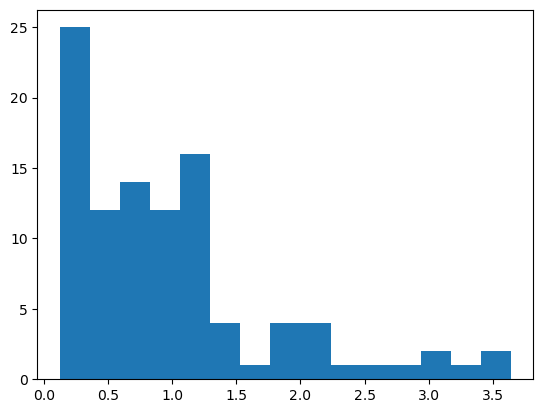

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
simnum = 0
ns = 10000
rbin = 8
rmin, rmax = 3., 25.
njk = 10
#filename = f'../data/vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{simnum}.dat'
filedir = '/home/fdavilakurban/mnts/clemente/Proyectos/VPF_Quijote/data/output/'

filelist = os.listdir(filedir)
nsim = len(filelist)

chis = []

# Read all files
for file in filelist:
    data = ascii.read(filedir+file)
    chis.append( data['chi'] )

# Calculate the covariance summation and covariance proper
covsum = 0
chis_mean = np.mean(chis,axis=0)
for i in range(nsim):
    covsum += np.dot((chis[i]-chis_mean),(chis[i]-chis_mean))
cov = covsum/(nsim-1)

# Calculate chi squared
chisq = []
for i in range(nsim):
    chisq.append( np.dot((chis[i]-chis_mean)/cov, (chis[i]-chis_mean)) )

plt.hist(chisq,bins=15)
plt.show()

